<a href="https://colab.research.google.com/github/bhoomireddyvijayakumari/student_P-F_prediction/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task -1 Student Pass or Fail Prediction

Objective

-Predict whether a student will pass or fail based on their study hours and attendance.

In [1]:
import pandas as pd

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/task5/student.csv')

Mounted at /content/drive


In [ ]:
# 1. Data Exploration
print(df.head())

  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final_Exam_Score Pass_F

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB
None


In [ ]:
df.isnull().sum()

,0
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


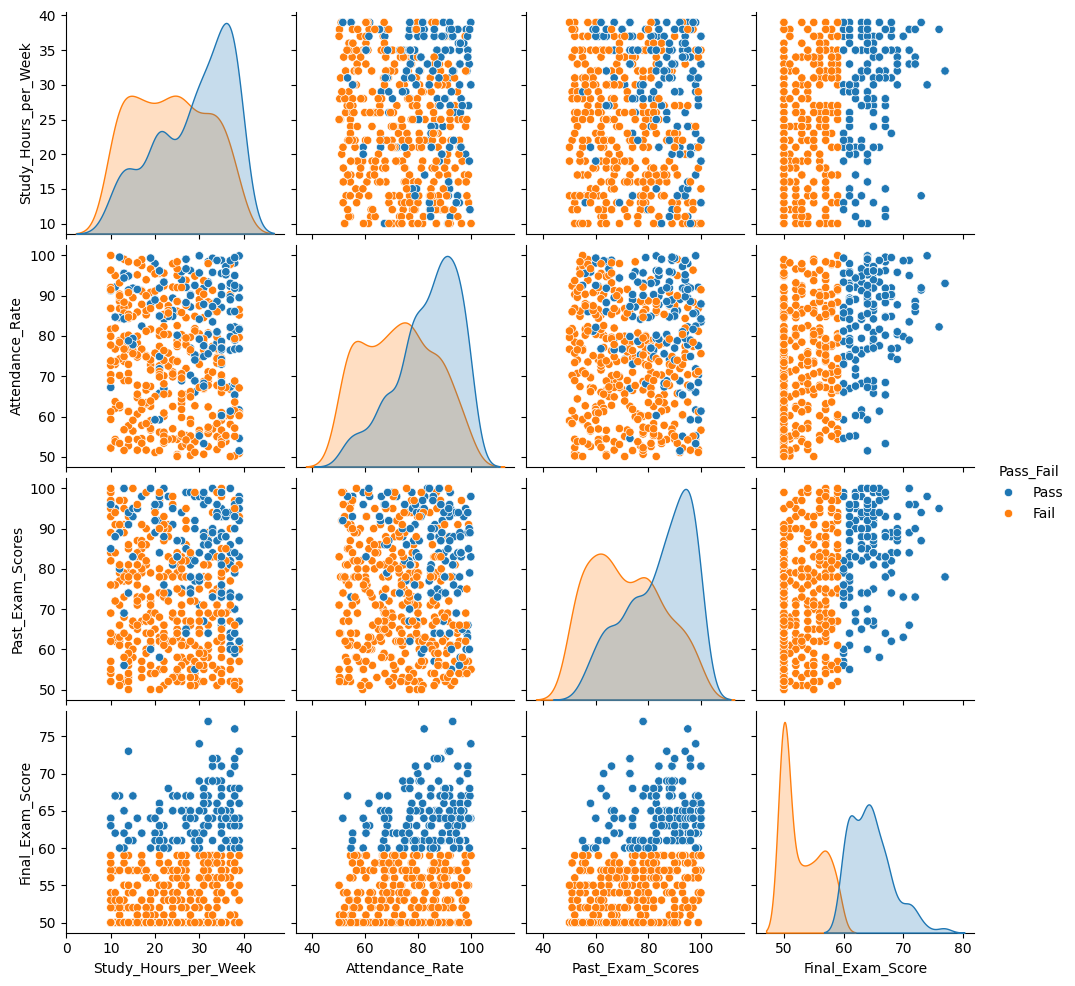

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df, hue='Pass_Fail')
plt.show()


#Insights
Study Hours and Attendance positively correlate with passing. Those with high attendance and more study hours tend to pass.

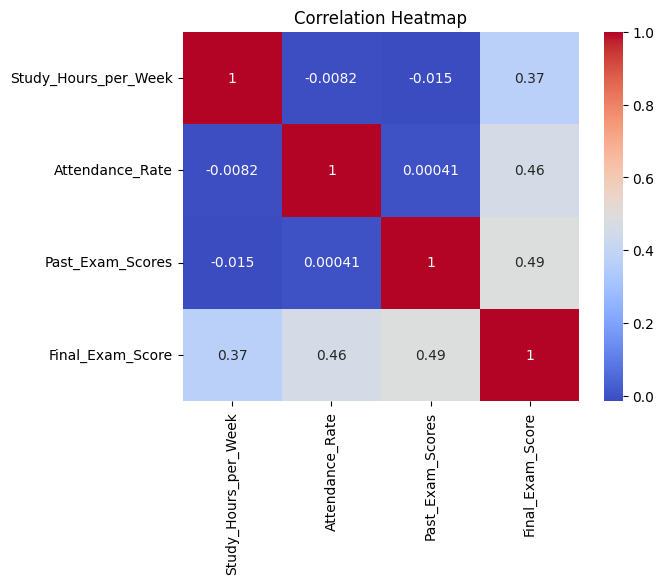

In [ ]:

numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap of correlation
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#2. Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
X = df[['Study_Hours_per_Week', 'Attendance_Rate']]
y = df['Pass_Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
#3. Model Evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.7464788732394366


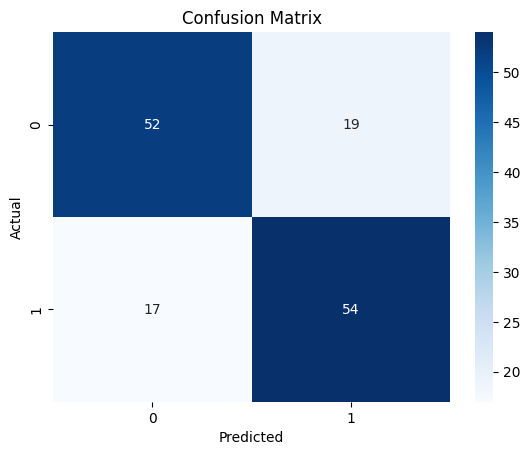

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


##Task -2 Sentiment Analysis using NLP

Objective

Analyze customer reviews to classify sentiments as positive or negative.


In [2]:
import numpy as np
import io
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning - Task 1 (Student Pass/Fail)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Machine Learning - Task 2 (Sentiment Analysis)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import nltk

# Download necessary NLTK data (only need to run this once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')

In [16]:
# 1. Dataset Selection (Create a Dataset)
positive_reviews = [
    "Absolutely thrilled with this item! Exceeded every expectation.",
    "Top-notch performance and sleek design. Totally worth it!",
    "Everything about this was perfect. Would buy again in a heartbeat.",
    "Impressed with the fast delivery and outstanding quality.",
    "Flawless product. Does exactly what it's supposed to and more.",
    "Very pleased! It's user-friendly and built to last.",
    "Such a great find. I’m genuinely impressed by the value.",
    "Five stars without a doubt. It made my day!",
    "Exceptional craftsmanship. Clearly made with care.",
    "Highly efficient and reliable. This has made my life easier."
]

negative_reviews = [
    "Horrible experience. It stopped working within hours.",
    "Disappointed beyond words. Terrible build quality.",
    "Does not live up to the hype. Completely underwhelming.",
    "Received the wrong item and had no help resolving it.",
    "Low-quality material and very flimsy. Not recommended.",
    "Instructions were confusing and it barely functions.",
    "Big letdown. I had high hopes but it failed miserably.",
    "Unusable straight out of the box. Don't waste your cash.",
    "Terrible packaging and the product arrived scratched.",
    "Feels cheap and breaks easily. Wouldn't buy again."
]
positive_reviews += [
    "Absolutely love this! Will definitely purchase again.",
    "Surprised by how well it performs. Totally impressed.",
    "Very intuitive and smooth experience. Five stars!",
    "Really satisfied. Everything was well packaged and fast.",
    "Works exactly as expected. I'm quite happy.",
    "Affordable and high quality — a rare combo.",
    "Customer support went above and beyond. Thank you!",
    "Feels premium. Exceeded my hopes in every way.",
    "Perfect for daily use. Highly recommend it.",
    "No complaints at all. Would gift this to friends too.",
    "Simple, efficient, and effective. Just what I needed.",
    "Best thing I’ve bought this year. Worth every penny.",
    "Blown away by the performance. 10/10.",
    "This made my work so much easier. Thankful!",
    "Reliable and durable product. Very satisfied.",
    "Easy to set up and works without a glitch.",
    "Product looks great and functions even better.",
    "Impressed with the responsiveness and build.",
    "Shipping was super fast. Item arrived in mint condition.",
    "Completely satisfied. Met all my expectations.",
    "It has all the features I needed. Excellent!",
    "Outstanding quality and smooth operation.",
    "Highly useful and well-thought-out design.",
    "Great build, great finish, and great utility.",
    "Amazing experience overall. Would buy again.",
    "Very well-made. Lives up to its description.",
    "This is a life-saver for me. So glad I found it.",
    "Simple to operate and delivers results.",
    "Pleasantly surprised. Worth the investment.",
    "A dependable product. Haven’t faced a single issue.",
    "The ease of use is unmatched. Love it.",
    "Would recommend to anyone without hesitation.",
    "One of the most useful items I own now.",
    "Performance is excellent for the price.",
    "Really appreciate the attention to detail.",
    "So far so good! I’m impressed.",
    "The quality speaks for itself. Very nice.",
    "Does what it promises, and then some.",
    "Perfect for beginners and experts alike.",
    "Stylish and functional. Very happy with it."
]
negative_reviews += [
    "Completely broke down in just two days. Terrible!",
    "Very misleading product description. Not happy.",
    "Stopped working right after the return period ended.",
    "Cheaply made and very disappointing.",
    "Terrible performance and awful design choices.",
    "Not worth the money at all. Avoid it.",
    "Support was unresponsive. Felt abandoned.",
    "Wouldn’t recommend this to anyone. Waste of time.",
    "Unreliable and frustrating to use.",
    "Had to replace it immediately. Poor quality.",
    "Received it late and it didn’t even work properly.",
    "Overheats and shuts down constantly.",
    "Painfully slow and unresponsive. Regret buying it.",
    "It was defective out of the box. Not acceptable.",
    "The build is flimsy and the design is awkward.",
    "Feels like a prototype, not a finished product.",
    "Doesn’t match the pictures shown online.",
    "Absolutely the worst purchase I’ve made this year.",
    "Already falling apart after light usage.",
    "Clunky interface and unintuitive controls.",
    "Unacceptable experience. Very frustrating.",
    "Refund process was a nightmare. Stay away.",
    "Nothing worked as described. Major disappointment.",
    "Battery life is pathetic. Doesn’t last long.",
    "Too many issues to list. Not usable.",
    "Very buggy and crashes often.",
    "Product came with missing parts. Inexcusable.",
    "Poorly assembled and stopped working quickly.",
    "Not even remotely close to what's advertised.",
    "Looks good but performs horribly.",
    "So many flaws that I lost count.",
    "Felt like a scam. Wouldn’t trust this brand again.",
    "Does not hold up under regular use.",
    "Terrible smell right out of the box.",
    "I regret trusting the positive reviews.",
    "Feels more like a toy than a real product.",
    "Hard to set up and barely functional.",
    "The button broke after a few uses.",
    "Too expensive for what it does. Totally overrated.",
    "Nothing but problems since day one."
]


In [27]:
review_texts = positive_reviews + negative_reviews
sentiments = ['positive'] * len(positive_reviews) + ['negative'] * len(negative_reviews)

df_reviews = pd.DataFrame({
    'Review_Text': review_texts,
    'Sentiment': sentiments
}).sample(frac=1, random_state=42).reset_index(drop=True)

df_reviews['Sentiment_Label'] = df_reviews['Sentiment'].map({'negative': 0, 'positive': 1})


In [28]:
# Shuffle the dataset to mix positive and negative reviews
df_reviews = df_reviews.sample(frac=1, random_state=42).reset_index(drop=True)

# Map sentiment labels to numbers (0 for negative, 1 for positive)
df_reviews['Sentiment_Label'] = df_reviews['Sentiment'].map({'negative': 0, 'positive': 1})

print("Generated Reviews Dataset:")
print(df_reviews)

Generated Reviews Dataset:
                                          Review_Text Sentiment  \
0      Completely satisfied. Met all my expectations.  positive   
1         Pleasantly surprised. Worth the investment.  positive   
2          Clunky interface and unintuitive controls.  negative   
3   No complaints at all. Would gift this to frien...  positive   
4        Impressed with the responsiveness and build.  positive   
..                                                ...       ...   
95  Big letdown. I had high hopes but it failed mi...  negative   
96      Would recommend to anyone without hesitation.  positive   
97                   So many flaws that I lost count.  negative   
98      Product came with missing parts. Inexcusable.  negative   
99  Impressed with the fast delivery and outstandi...  positive   

    Sentiment_Label  
0                 1  
1                 1  
2                 0  
3                 1  
4                 1  
..              ...  
95            

In [29]:
# #### a. Load and Preprocess the Dataset
# - Remove stopwords, punctuation, special characters.
# - Convert text to lowercase.
# - Tokenize and lemmatize the text.

lemmatizer = WordNetLemmatizer()
stopwords_eng = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+') # Matches word characters

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Tokenize and remove punctuation
    tokens = tokenizer.tokenize(text)
    # 3. Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords_eng]
    # 4. Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return " ".join(lemmatized_tokens)

In [30]:
df_reviews['Cleaned_Text'] = df_reviews['Review_Text'].apply(preprocess_text)

print("\nDataset with Cleaned and Tokenized Text Data:")
print(df_reviews[['Review_Text', 'Cleaned_Text']].head())


Dataset with Cleaned and Tokenized Text Data:
                                         Review_Text  \
0     Completely satisfied. Met all my expectations.   
1        Pleasantly surprised. Worth the investment.   
2         Clunky interface and unintuitive controls.   
3  No complaints at all. Would gift this to frien...   
4       Impressed with the responsiveness and build.   

                            Cleaned_Text  
0   completely satisfied met expectation  
1  pleasantly surprised worth investment  
2   clunky interface unintuitive control  
3            complaint would gift friend  
4         impressed responsiveness build  


In [31]:
# #### b. Text Vectorization
# - Convert text to a numerical format using TF-IDF.

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100) # Limit to top 100 features for simplicity

# Fit and transform the cleaned text
X_reviews_tfidf = tfidf_vectorizer.fit_transform(df_reviews['Cleaned_Text'])

# Define target variable
y_reviews = df_reviews['Sentiment_Label']

In [32]:
#### c. Model Training & Evaluation

# Split data into training and testing sets
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(
    X_reviews_tfidf, y_reviews, test_size=0.2, random_state=42, stratify=y_reviews
)

# --- Deliverable 2: Sentiment Classification Model ---
# Initialize and train the Logistic Regression model
sentiment_model = LogisticRegression(random_state=42)
sentiment_model.fit(X_train_rev, y_train_rev)
print("Sentiment classification model trained.")

# Make predictions
y_pred_rev = sentiment_model.predict(X_test_rev)

Sentiment classification model trained.


In [33]:
print("\n--- Evaluation Report ---")
# Use classification_report for a comprehensive summary
report = classification_report(y_test_rev, y_pred_rev, target_names=['Negative', 'Positive'])
print(report)


--- Evaluation Report ---
              precision    recall  f1-score   support

    Negative       0.73      0.80      0.76        10
    Positive       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



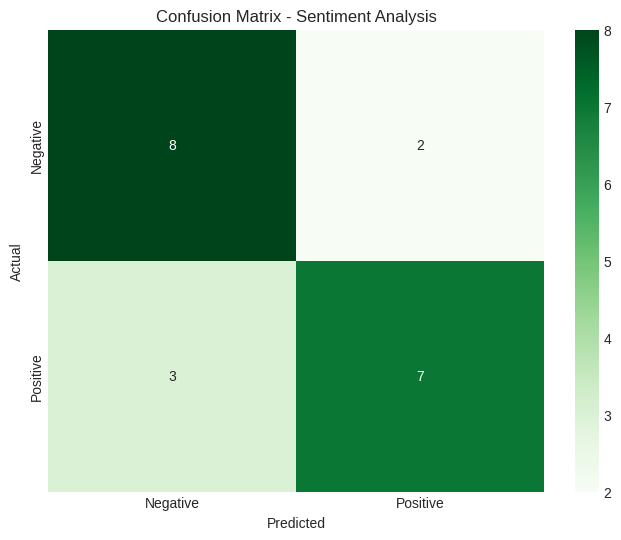

In [34]:
cm_rev = confusion_matrix(y_test_rev, y_pred_rev)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rev, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Sentiment Analysis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [35]:
df_test_results = df_reviews.loc[y_test_rev.index]
df_test_results['Predicted_Sentiment'] = ['positive' if p == 1 else 'negative' for p in y_pred_rev]
print("\nPrediction Results on Test Data:")
print(df_test_results[['Review_Text', 'Sentiment', 'Predicted_Sentiment']])



Prediction Results on Test Data:
                                          Review_Text Sentiment  \
10  Very intuitive and smooth experience. Five stars!  positive   
45          Outstanding quality and smooth operation.  positive   
19              Does what it promises, and then some.  positive   
1         Pleasantly surprised. Worth the investment.  positive   
24                 The button broke after a few uses.  negative   
41               Terrible smell right out of the box.  negative   
50       Had to replace it immediately. Poor quality.  negative   
38  Very pleased! It's user-friendly and built to ...  positive   
46               Too many issues to list. Not usable.  negative   
55            I regret trusting the positive reviews.  negative   
86      Not even remotely close to what's advertised.  negative   
11  Surprised by how well it performs. Totally imp...  positive   
98      Product came with missing parts. Inexcusable.  negative   
79                  Looks go

In [36]:
# Show common features (words) for positive and negative reviews
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = sentiment_model.coef_[0]

# Create a DataFrame of words and their coefficients
coef_df = pd.DataFrame({'Word': feature_names, 'Coefficient': coefficients})

# Top words for positive sentiment (highest coefficients)
top_positive_words = coef_df.sort_values(by='Coefficient', ascending=False).head(5)
print("\nTop 5 Words Associated with POSITIVE Sentiment:")
print(top_positive_words)


Top 5 Words Associated with POSITIVE Sentiment:
         Word  Coefficient
98      would     0.874360
44  impressed     0.671209
91    without     0.591628
51       love     0.588343
72     simple     0.582374


In [37]:
# Top words for negative sentiment (lowest coefficients)
top_negative_words = coef_df.sort_values(by='Coefficient', ascending=True).head(5)
print("\nTop 5 Words Associated with NEGATIVE Sentiment:")
print(top_negative_words)


Top 5 Words Associated with NEGATIVE Sentiment:
        Word  Coefficient
78  terrible    -0.730232
31      feel    -0.629810
49      like    -0.591778
65  received    -0.561895
12       box    -0.546284
